In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Animal Classification Using Convolutional Neural Networks (CNN)**

# **Overview of the Data**
This project involves the classification of animal images into two categories: wild and domestic. Using Convolutional Neural Networks (CNNs), the project processes image data and builds a model that predicts the category based on learned features. The dataset is sourced from Google Drive, with a structured preprocessing and evaluation workflow.

# **Importing Libraries**

- Various libraries were used for handling data, visualizing results, processing images, and building machine learning models. These included TensorFlow, OpenCV, Matplotlib, Seaborn, and Scikit-learn.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import os
import cv2
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pickle

# **Loading the Dataset**
- The dataset was structured into two categories (wild and domestic) within subdirectories. Images were read from these directories to prepare them for preprocessing.

In [ ]:
data = ('/content/drive/MyDrive/animal')

In [ ]:
DIRECTORY = r"/content/drive/MyDrive/animal"
CATEGORIES = ['wild','domestic']


# **Creating the loop that joins the Image path and the Image Categoriess**

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  print(path)

/content/drive/MyDrive/animal/wild
/content/drive/MyDrive/animal/domestic


In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    print(img_path)
    break

/content/drive/MyDrive/animal/wild/wild (1).png
/content/drive/MyDrive/animal/domestic/domestic (1).jpg


# **Listing the images present in the file folder**

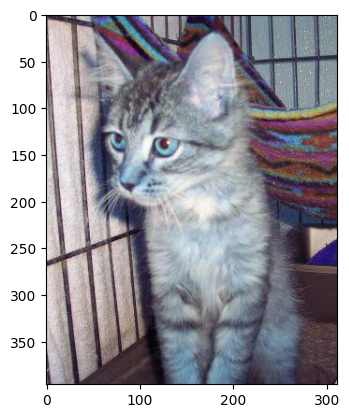

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    plt.imshow(img_arr)
    break

# **Preprocessing Steps**
- **Resizing Images:** All images were resized to a uniform dimension of 150x150 pixels to ensure consistency for the CNN input.
- **Color Filtering:** HSV color filtering was optionally applied to isolate and emphasize specific features in the images.
- **Feature Matrix and Target Vector:** The images and their corresponding labels were stored as arrays for model training and evaluation.
- **Normalization:** The pixel values of images were scaled to fall between 0 and 1 to optimize model training.

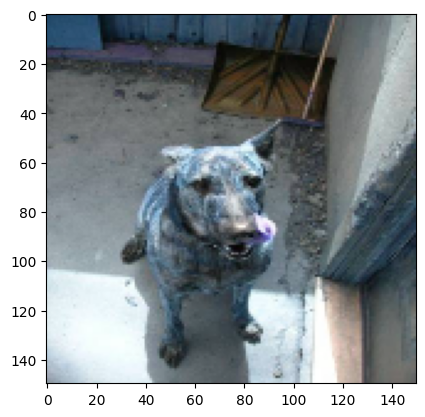

In [ ]:
IMG_SIZE = 150
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    plt.imshow(img_arr)

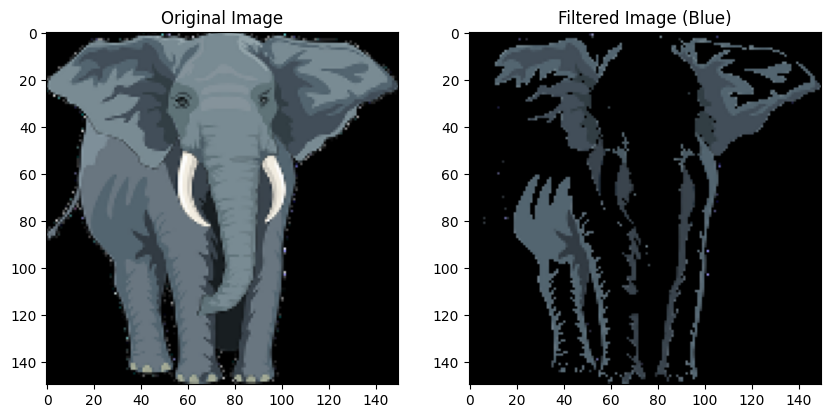

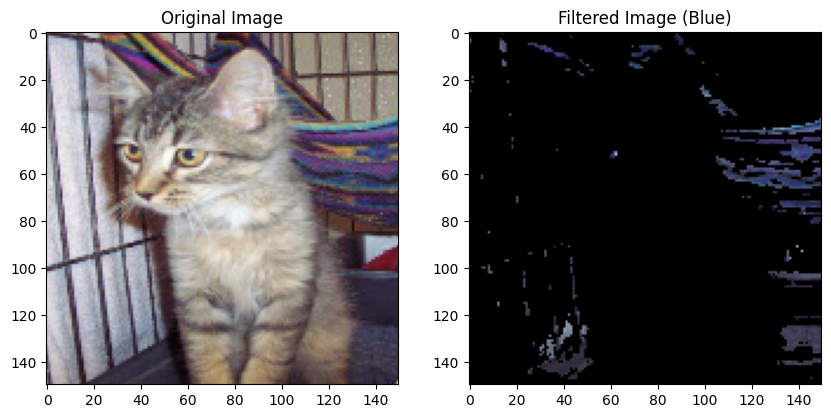

In [ ]:
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 150

for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(img_arr, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for the color you want to filter (example: blue)
    lower_blue = np.array([100,50,50])
    upper_blue = np.array([130,255,255])

    # Create a mask based on the color range
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    # Apply the mask to the original image to isolate the color
    result = cv2.bitwise_and(img_arr, img_arr, mask=mask)

    # Display the original and filtered images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title("Filtered Image (Blue)")
    plt.show()

    break # Remove this line to show the image for all files

In [ ]:
data = []

for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  label = CATEGORIES.index(category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    data.append([img_arr,label])

In [ ]:
len(data)

742

# **Shuffling the data and Splitting  into feature matrix (X) and target vector (y).**

**The dataset was divided into:**

- ***Training Set:*** 75% of the data, used to train the model.
- ***Validation Set:*** 25% of the remaining training data, used to fine-tune and evaluate during training.
- ***Test Set:*** 10% of the overall data, reserved for final performance evaluation.

In [ ]:
random.shuffle(data)
X = []
y = []

for features,label in data:
  X.append(features)
  y.append(label)

X = np.array(X)
y = np.array(y)

X = X/255.0
print(X.shape)


(742, 150, 150, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# **Model Architecture**
**The CNN model had the following key components:**

- ***Convolutional Layers:*** Extracted features from images.
- ***MaxPooling Layers:*** Reduced the spatial dimensions of features to enhance computational efficiency.
- ***Dropout Layers:*** Prevented overfitting by randomly deactivating some neurons during training.
- ***Dense Layers:*** Combined extracted features to predict whether an image is wild or domestic.

In [ ]:
#Implementing the Vanilla Model using a plain architecture

model = Sequential()

# First convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))  # New dropout layer after pooling

# Second convolutional block
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))  # New dropout layer after pooling

# Third convolutional block
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))  # Existing dropout layer

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # New dropout layer after dense
model.add(Dense(1, activation='sigmoid'))


# **Model Compilation and Training**
- The model was trained using the Adam optimizer and a binary cross-entropy loss function.
- Training involved 20 epochs with a batch size of 16.
- Training and validation metrics were monitored to evaluate the model's performance across epochs.

In [ ]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), verbose=1)

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_79 (Conv2D)                   │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 72, 72, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_80 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 34, 34, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_81 (MaxPooling2D)      │ (None, 17, 17, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 17, 17, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_29 (Flatten)                 │ (None, 4624)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 256)                 │       1,184,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,209,137 (4.61 MB)

 Trainable params: 1,209,137 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4495 - loss: 1.1128 - val_accuracy: 0.4671 - val_loss: 0.6938
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 995ms/step - accuracy: 0.5476 - loss: 0.6894 - val_accuracy: 0.6048 - val_loss: 0.6907
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1000ms/step - accuracy: 0.5479 - loss: 0.6933 - val_accuracy: 0.4671 - val_loss: 0.6952
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 969ms/step - accuracy: 0.5472 - loss: 0.6911 - val_accuracy: 0.4671 - val_loss: 0.6956
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 972ms/step - accuracy: 0.5422 - loss: 0.6691 - val_accuracy: 0.5449 - val_loss: 0.7786
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 957ms/step - accuracy: 0.6224 - loss: 0.6582 - val_accuracy: 0.5449 - val_loss: 0.6895
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 957ms/step - accuracy: 0.6801 - loss: 0.5630 - val_accuracy: 0.6587 - val_loss: 0.6343
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 920ms/step - accuracy: 0.7151 - loss: 0.5844 - val_accura

# **Confusion matrix of the vanilla model**
- ***Confusion Matrix:*** This provided insights into the number of correct and incorrect predictions for both categories, highlighting potential areas for improvement.

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step


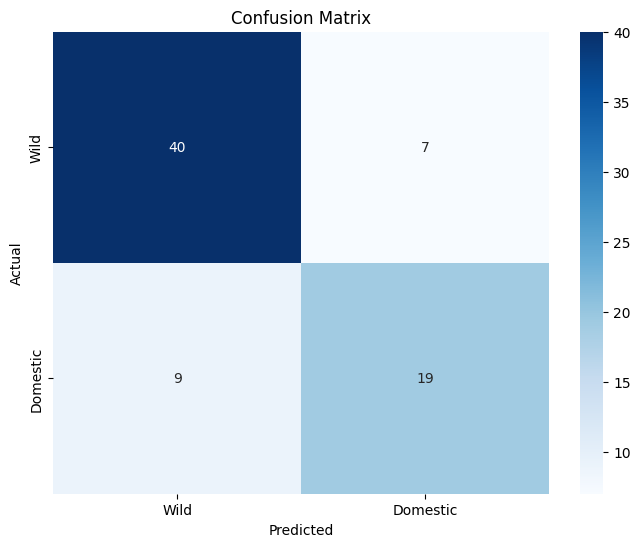

In [ ]:
# ploting the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Wild', 'Domestic'], yticklabels=['Wild', 'Domestic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


This confusion matrix shows that 40 times, the model predicted wild animals as the actual wild animals. 9 times, it predicted domestic animals as wild. 7 times, it predicted wild animals as domestic. Also, 19 times, it predicted domestic animals as domestic animals, which is right. At that point, we can see our model is not performing very well but is manageable.

# **Saving the model**
- The trained model was saved using serialization techniques for future use, ensuring it could be reloaded without retraining.

In [ ]:
#  save as model

import pickle

pickle.dump(model, open('pipe.pkl', 'wb'))



# **Model performance**

- ***Accuracy and Loss Plots:*** Training and validation accuracy/loss were plotted to track learning patterns and detect overfitting or underfitting.

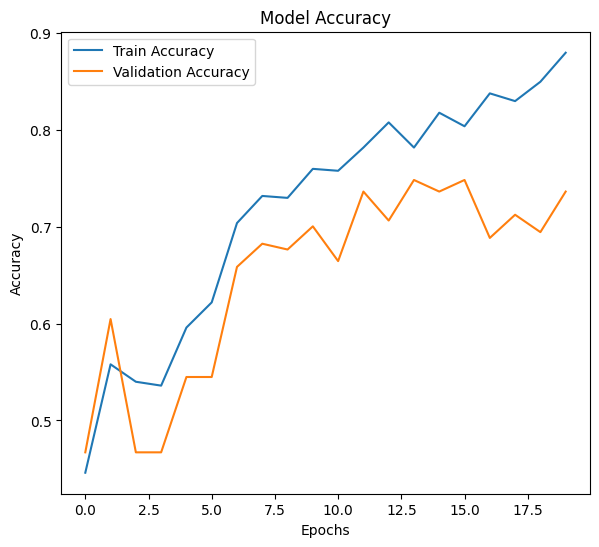

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(15, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



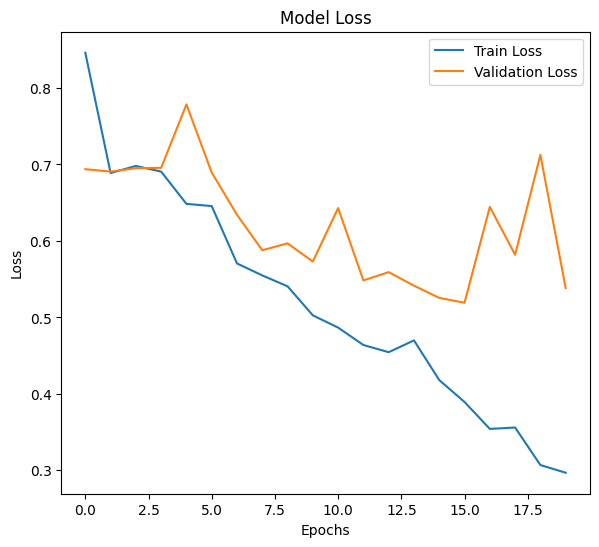

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(15, 6))

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Model Evaluation**

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 439ms/step - accuracy: 0.7554 - loss: 0.5186
Validation Loss: 0.5384422540664673
Validation Accuracy: 0.7365269660949707


# **Predicting Uploaded Image**

Saving download (3).jpeg to download (3) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


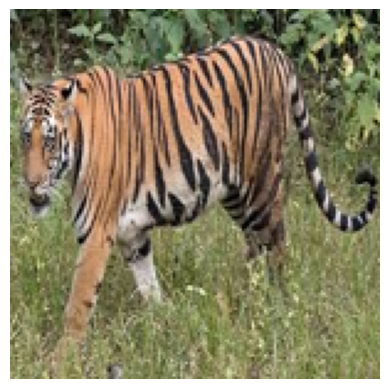

Predicted class: wild


In [5]:


from google.colab import files
from io import BytesIO
from PIL import Image
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  img = Image.open(BytesIO(uploaded[fn]))
  img = img.resize((150, 150))
  img_array = np.array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)

  # Load your trained model using pickle
  with open('pipe.pkl', 'rb') as file:
    model = pickle.load(file)

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)

  # Display the uploaded image
  plt.imshow(img)
  plt.axis('off')
  plt.show()


  # Print the predicted class
  class_names = ['wild', 'domestic']
  print("Predicted class:", class_names[predicted_class])

THE END
# **Ochan LOKIDORMOI**